# Summary
* train 데이터는 반 고흐 그림이 가장 많습니다.(데이터 불균형)
* 근세 시대 그림보다 근대 그림이 더 많습니다. 
* Impression, Post Impression 장르의 화가가 가장 많습니다.


결론적으로 19-20세기(근대) 인상주의, 탈인상주의 화가 중 특히 빈센트 반 고흐, 에드가 드가 그림을 잘 분류 한다는 결론을 내렸습니다.

[Github](https://github.com/cjfghk5697/Code_Share/blob/main/Data%20Analysis/Artwork%20Painter%20Data%20Analysis/Artwork%20Painter%20Data%20Analysis.ipynb)

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

# 그림 분포
첫 번째로 알아볼 것은 train 데이터에 "화가마다 몇점의 그림이 있을까?" 라는 의문입니다. 만약 특정 화가 그림만 있어서 데이터가 불균형하면 문제입니다. 그래서 몇점의 그림이 데이터셋에 들어가 있는지 확인해보겠습니다.

In [145]:
train = pd.read_csv('./train.csv')
train_counts=train['artist'].value_counts()

In [146]:
print(f'총 그림 {len(train)}점')

총 그림 5911점


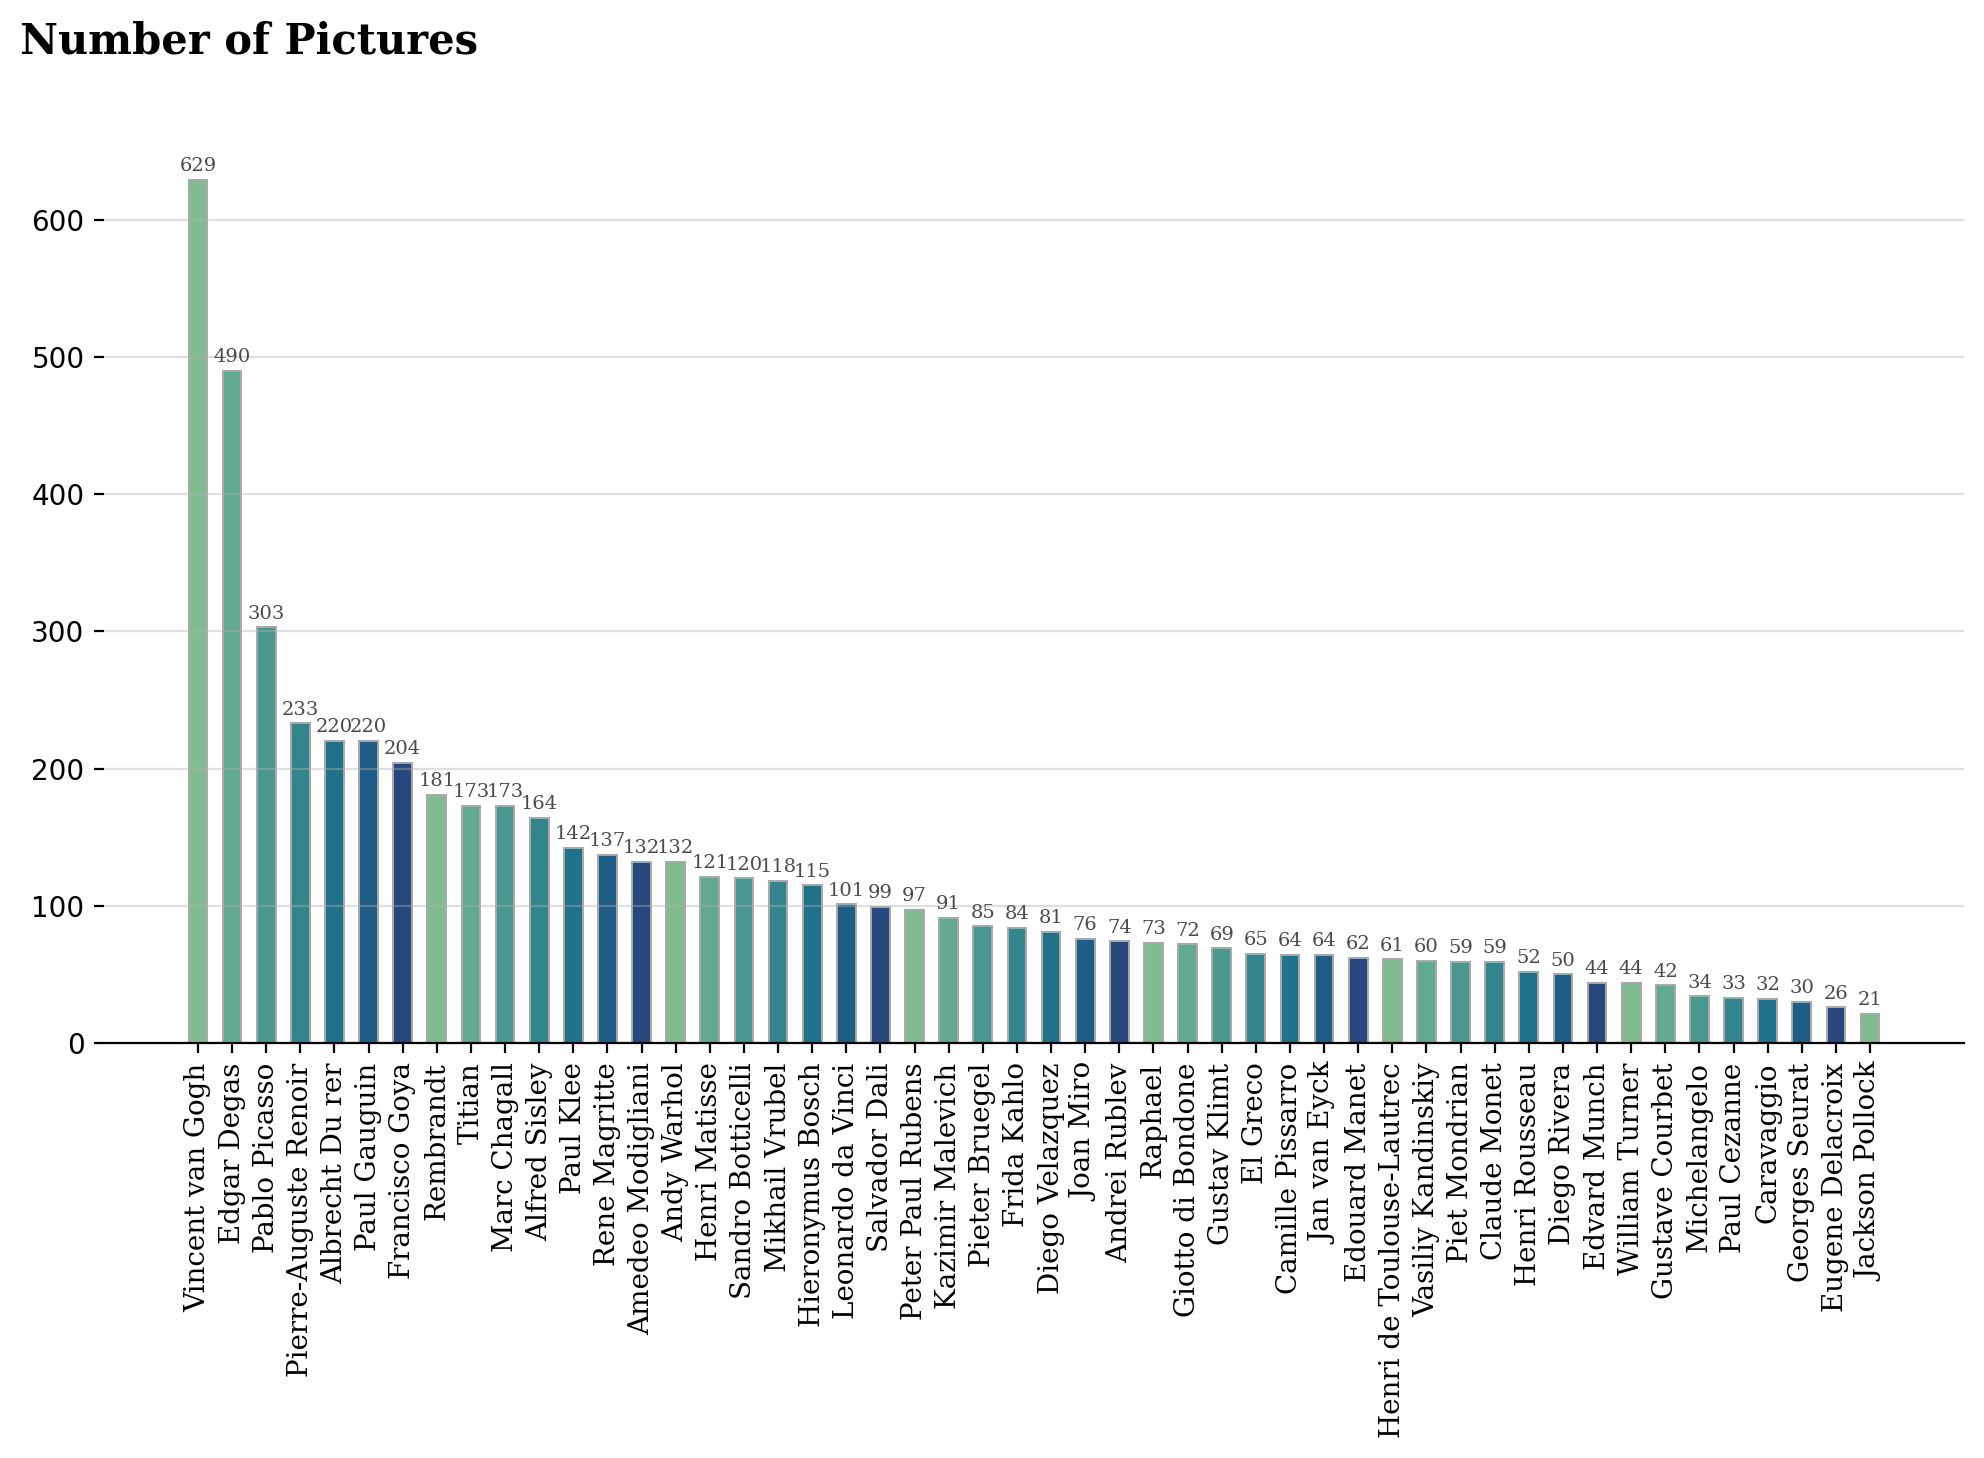

In [147]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.bar(train_counts.index, train_counts, width=0.55,
       edgecolor='darkgray',color=sns.color_palette('crest',7),
        linewidth=0.7
       )

for artist in train_counts.index:
  ax.annotate(f'{train_counts[artist]}',
              xy=(artist, train_counts[artist]+10),
              va='center', ha='center', fontweight='light', fontfamily='serif',
              fontsize=7,color='#4a4a4a'
              )

for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(train_counts.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Number of Pictures', fontsize=15, fontweight='bold', fontfamily='serif') 
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

확인 해보니 반 고흐의 그림이 629점으로 가장 많습니다. 반면 잭슨 폴락의 그림은 21장으로 가장 적습니다.

결국은 반고흐가 총 그림 수 10%를 차지합니다.

그리고 반 고흐, 에드가 드가와 피카소 이 3명이 화가 3%인 반면 그림 수는 24%를 차지합니다. 

즉, 특정 인물들에게 그림이 몰려있습니다. 이런 경우에는 Oversampling을 이용해서 불균형한 분포를 채우는 방법을 이용 할 수 있습니다. 

* 참고로 피카소를 제외한 에드가 드가와 반 고흐는 20세기 근대 화가로 에드가 드가는 Impressionism, 반 고흐는 Post-Impressionism입니다.

In [148]:
artist_info = pd.read_csv('./artists_info.csv')
artist_info.head()

,name,years,genre,nationality
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican
3,Claude Monet,1840 - 1926,Impressionism,French
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian


artist_info.csv에 years 열에 하이폰으로 '출생 - 사망' 나뉘어 있습니다. 하지만 긴 하이폰과 짧은 하이폰 2가지 종류로 나뉘어져 있습니다. 그래서 아래 코드는 2가지 하이폰을 분류하기 위한 코드입니다.

In [149]:
artist_info['century']=0
for i,year in enumerate(artist_info['years']):
  if '–' in year:
    death=year.split(' – ')
  elif '-' in year:
    death=year.split(' - ')
  artist_info['century'][i]=(int(death[1])//100)+1

Artist_info.csv에서는 Albrecht Dürer로 적혀있지만 train csv에서는 Albrecht Du rer로 적혀있습니다.

그래서 artist_info에 Albrecht Dürer를 Albrecht Du rer로 수정했습니다.

In [150]:
artist_info['name'][19]='Albrecht Du rer'

In [151]:
artist_info['count']=0
for i,name in enumerate(artist_info['name']):
  artist_info['count'][i]=train_counts[name]

# 세기에 따른 화가 수
저는 세기에 따라 미술사가 변경하고 그림 스타일이 바뀐다고 생각했습니다. 그래서 특정 세기에 화가가 몰려 있다면 그 특정 세기 스타일 그림을 더 잘 분류 할 확률이 높습니다. 

* 일단 화가가 사망한 날을 기준으로 세기를 잡았습니다. 



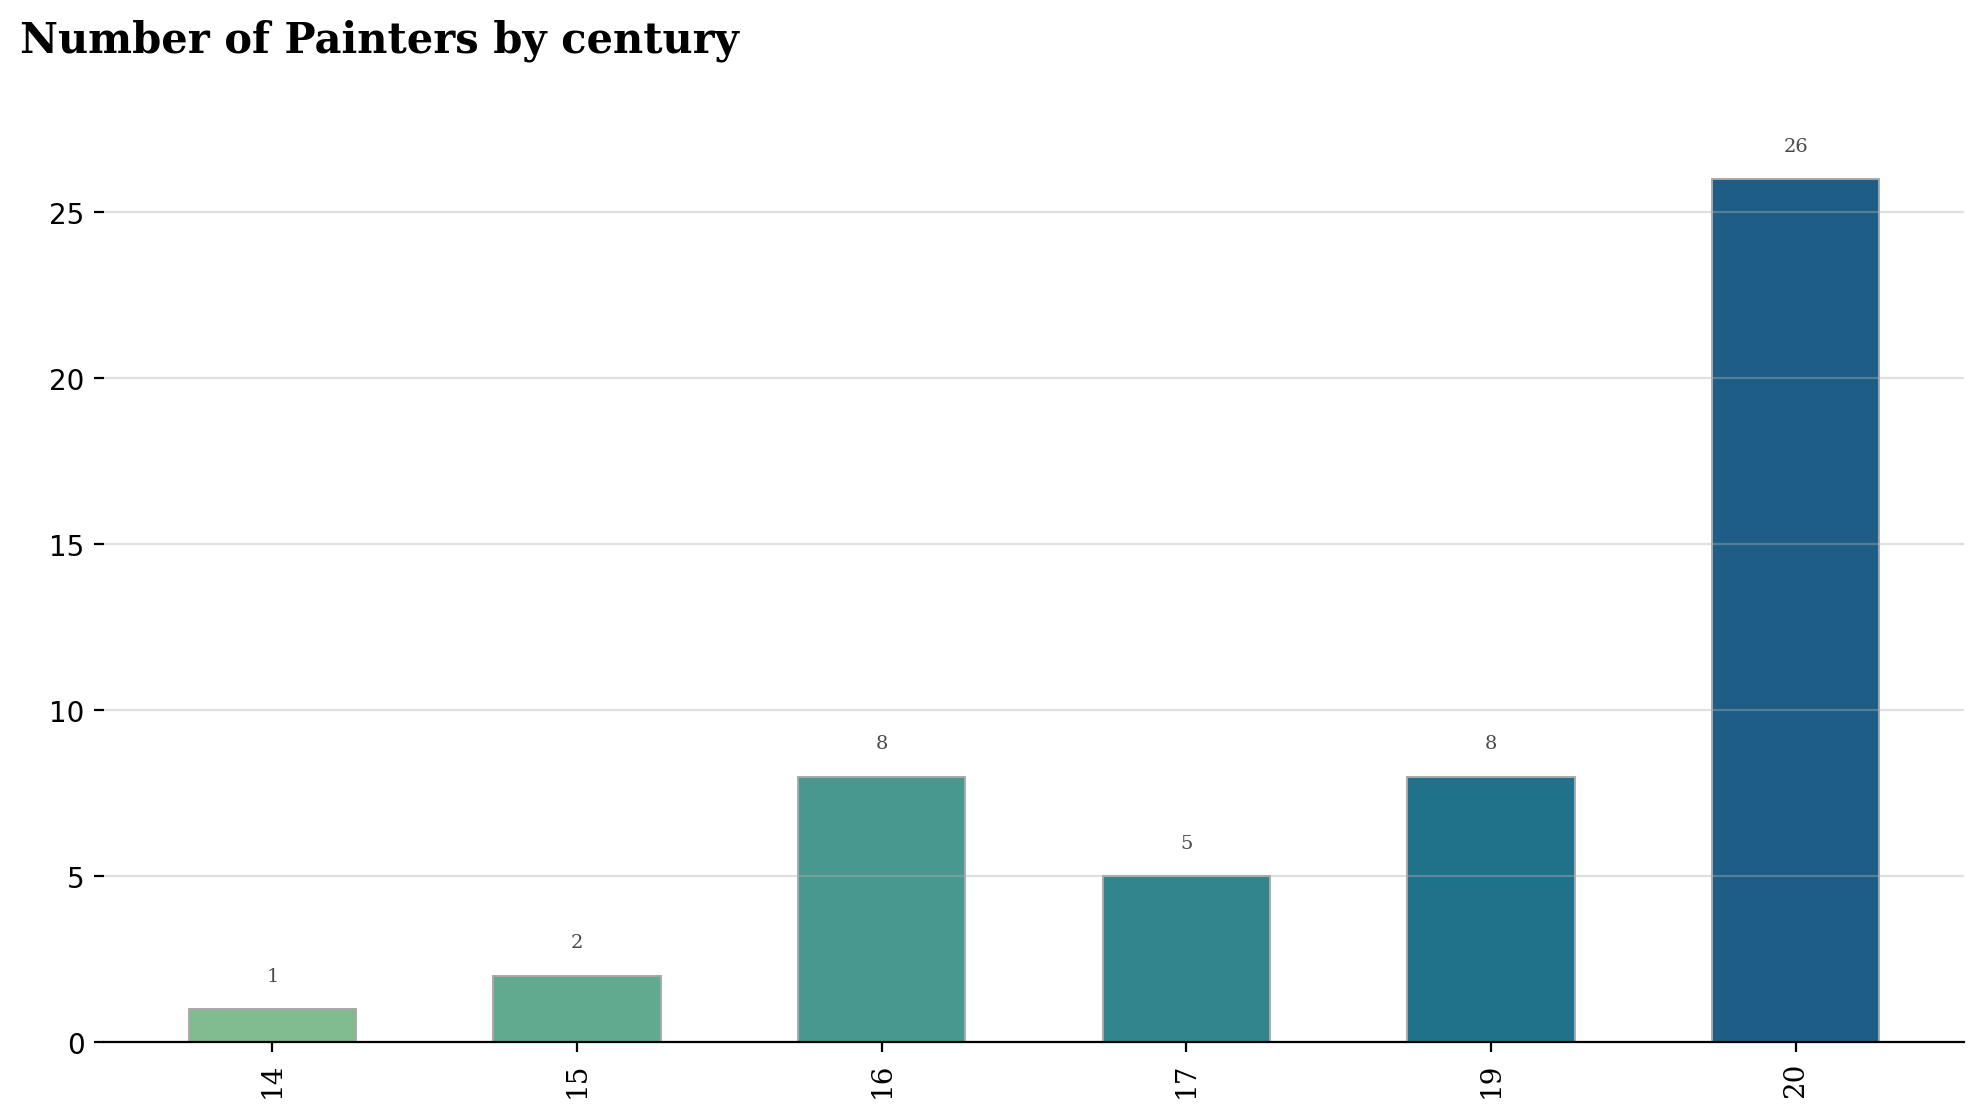

In [152]:
num_counts=artist_info['century'].astype(str).value_counts().sort_index()

fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.bar(num_counts.index, num_counts, width=0.55,
       edgecolor='darkgray',color=sns.color_palette('crest',7),
        linewidth=0.7
       )

for century in num_counts.index:
  ax.annotate(f'{num_counts[century]}',
              xy=(century, num_counts[century]+1),
              va='center', ha='center', fontweight='light', fontfamily='serif',
              fontsize=7,color='#4a4a4a'
              )

for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(num_counts.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Number of Painters by century', fontsize=15, fontweight='bold', fontfamily='serif') 
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

실제로 20세기 화가가 몰려 있습니다. 50명 중 26명이 20세기입니다. 그리고 19세기부터 20세기가 근대입니다. 근대 화가가 총 34명입니다. 그렇기에 학습 데이터 대부분 그림이 근대를 대표하는 주의 중 하나인 인상주의와 같은 주의를 확률이 높습니다.

In [153]:
century_artist=pd.DataFrame()
for cn in artist_info['century'].drop_duplicates():
  century_artist[str(cn)]=[0]
for i in range(len(artist_info)):
  century_artist[str(artist_info['century'][i])]+=artist_info['count'][i]

century_artist=century_artist.transpose()[0].sort_index()

# 세기에 따른 그림수
위에서 봤듯이 20세기 화가가 절반 이상입니다. 그러므로 20세기 화가가 많으니 20세기 그림이 많다고 예상 할 수 있습니다. 

그리고 근대와 근세로 나누어 어느 세대에 가장 그림이 많을지 생각해볼 수 있습니다.(근세는 14-19세기 근대는 19-20세기입니다.) 


- **근대 미술**
> 모더니즘 | 리얼리즘 | 인상주의 | 탈인상주의 | 라파엘 전파 | 미술공예운동 | 아르누보 | 아르데코 | 탐미주의 | 분리파 | 표현주의 | 다리파 | 청기사파 | 더 스테일 | 바우하우스 | 추상회화 | 야수파 | 미래주의 | 다다이즘 | 초현실주의 | 기하학적 추상 | 아방가르드 | 구축주의 | 구조주의 | 절대주의 | 상징주의 | 입체주의 | 구성주의 | 퇴폐미술 | 권위주의 예술 | 사회주의 리얼리즘
- **근세 미술**
> 르네상스 | 매너리즘 | 바로크 | 로코코 | 신고전주의 | 낭만주의 | 아카데미즘

[출처]-[나무위키 미술사](https://namu.wiki/w/%EB%AF%B8%EC%88%A0%EC%82%AC%20%EA%B4%80%EB%A0%A8%20%EC%A0%95%EB%B3%B4)

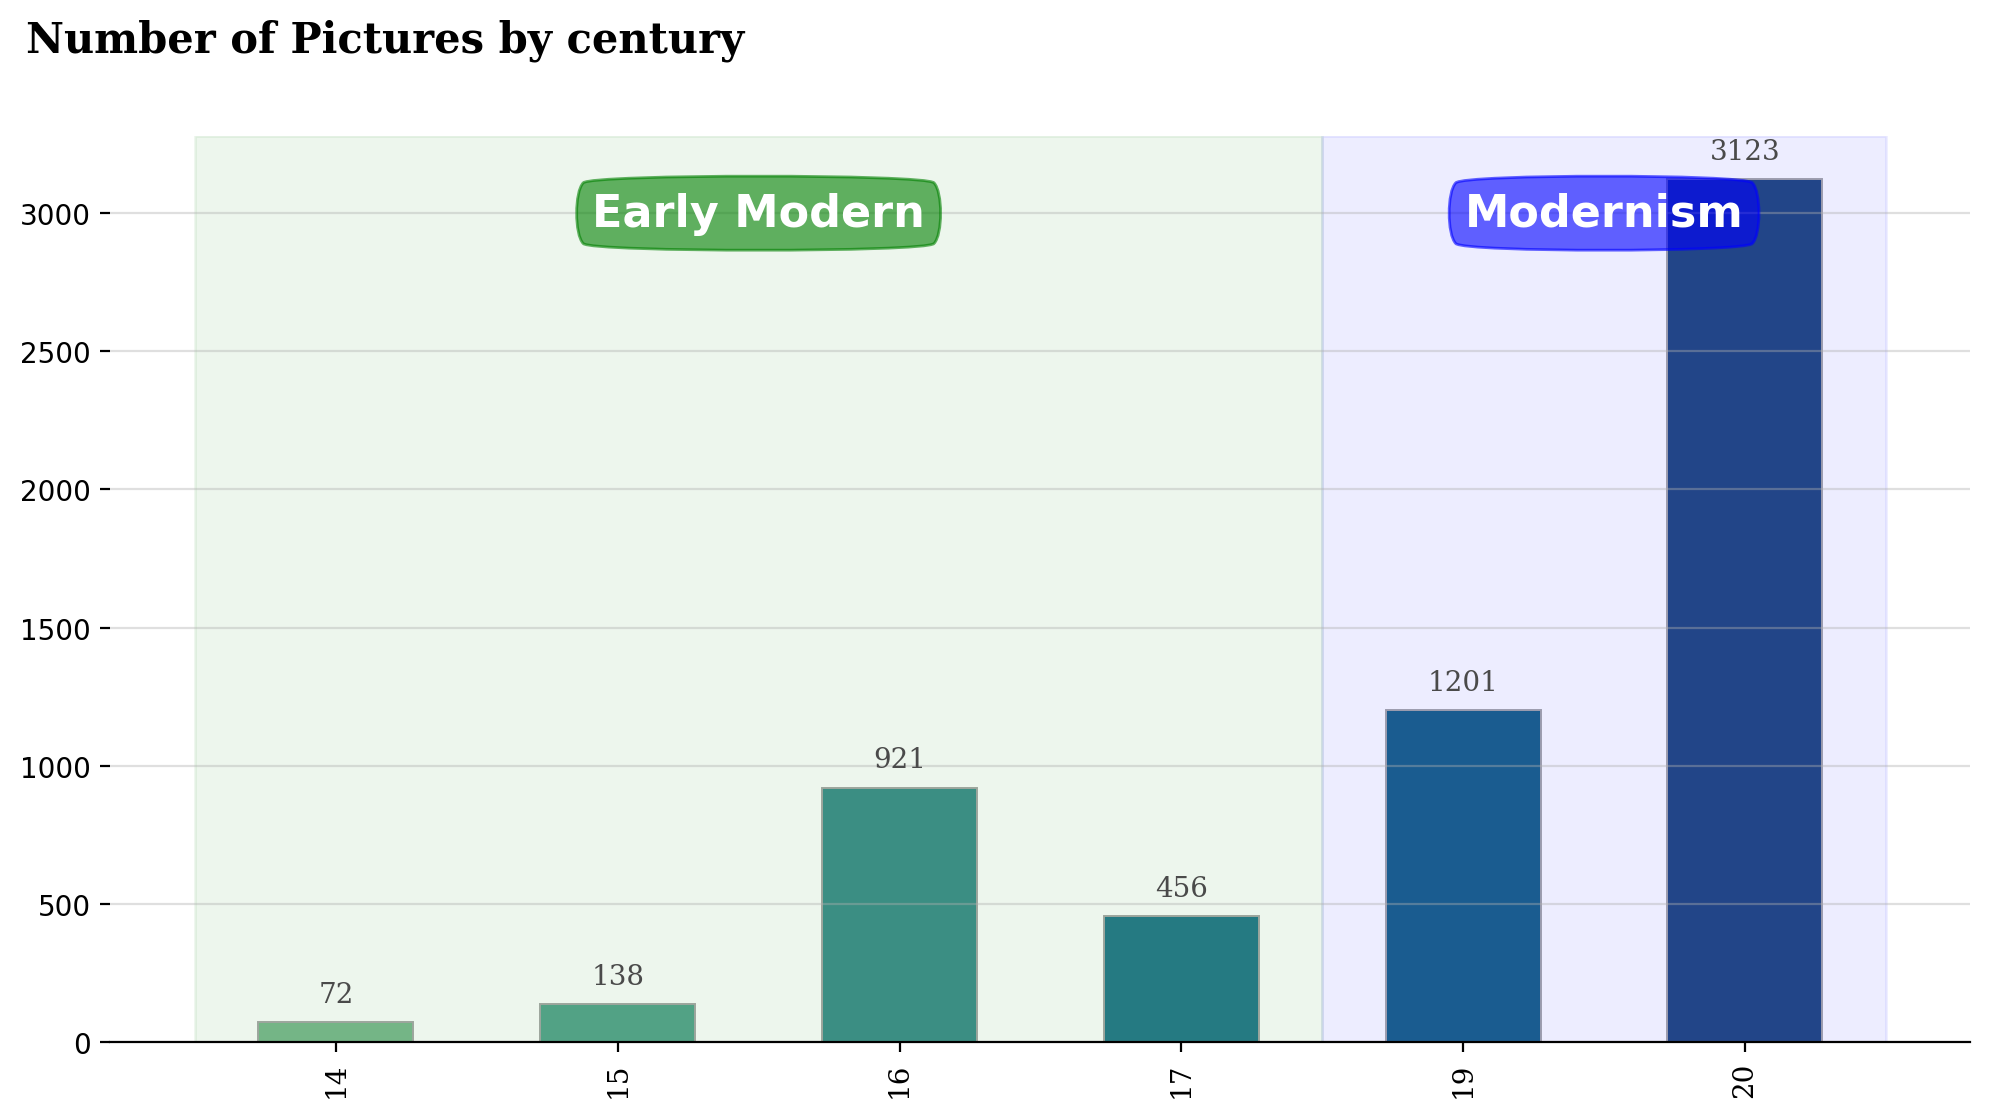

In [154]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.bar(century_artist.index, century_artist, width=0.55,
       edgecolor='darkgray',color=sns.color_palette('crest',6),
        linewidth=0.7
       )

for century in century_artist.index:
  ax.annotate(f'{century_artist[century]}',
              xy=(century, century_artist[century]+100),
              va='center', ha='center', fontweight='light', fontfamily='serif',color='#4a4a4a'
              )

span_range=[[-0.5,3.5],[3.5,5.5]]
color=['green',  'blue']
for idx, sub_title in enumerate(['Early Modern', 'Modernism']):
    ax.annotate(sub_title,
            xy=(sum(span_range[idx])/2 ,3000),
            xytext=(0,0), textcoords='offset points',
            va="center", ha="center",
            color="w", fontsize=16, fontweight='bold',
            bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
    ax.axvspan(span_range[idx][0],span_range[idx][1],  color=color[idx], alpha=0.07)
for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(century_artist.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Number of Pictures by century', fontsize=15, fontweight='bold', fontfamily='serif') 
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

근대가 근세보다 시기가 짧더라도 화가 수가 많아 그림수가 많다고 예상할 수 있습니다. 그리고 19세기와 16세기 화가수는 같습니다. 그럼에도 불구하고 19세기가 16세기보다 그림 수가 280점 더 많은 걸 확인 할 수 있습니다.

# 장르
이번에는 장르에 따른 분포를 알아볼 것입니다. artist_info.csv를 보면 화가들 중 2개 혹은 더 많은 장르를 소화하는 화가들이 있습니다. 문제는 같은 화가가 그렸어도 장르가 다른 그림은 스타일이 달라집니다. 예시를 들어보겠습니다.


Vasiliy Kandinskiy(Wassily Kandinsky, 바실리 칸단스키)는 유명한 러시아 화가입니다. 표현주의(Expressionism)와 추상미술(Abstractionism)의 주요 인물입니다. 같은 화가가 그렸지만 다른 장르로 그린 그림을 보겠습니다.

|Abstractionism(추상)|Expressionism(표현)|
|------|------|
|<img width="120px" height="100px" src="https://magazine.artland.com/wp-content/uploads/2020/01/image-2.jpg">|<img width="120px" height="100px" class="l-u-Ab-zb-Ua" data-drive-wiz-load-handling="" src="https://www.wassilykandinsky.net/images/articles/2625/2.jpg">|

장르(주의)가 다르니 그림이 달라집니다. 만약 Vasiliy Kandinskiy 학습 데이터가 추상주의 그림 수가 적고 표현주의 그림이 많다고 가정해보겠습니다. 그렇다면 표현주의 그림을 잘 분류하고 추상주의는 잘 분류 못할 확률이 높습니다. 결국 모델은 Vasiliy Kandinskiy 그림 중 표현주의만 잘 분류하고 추상주의 그림을 보고 Vasiliy Kandinskiy를 강하게 부정 할 수 있습니다. 결국 train과 inference에서 괴리감이 있을 수 있습니다.

일단 지금은 어떤 장르 화가가 가장 많은지 알아볼 것입니다. 가장 많은 장르 2개는 다른 색깔로 표시하겠습니다.


In [155]:
genres=pd.DataFrame()

for i,name in enumerate(artist_info['name']):
  if ',' in artist_info['genre'][i]:
    genre=artist_info['genre'][i].split(',')
    for x in genre:
      if x not in genres.columns:
        genres[str(x)] = [0]
      genres[str(x)]+=1    
  else:
    genre=artist_info['genre'][i]
    if genre not in genres.columns:
      genres[str(genre)] = [0]
    genres[str(genre)]+=1

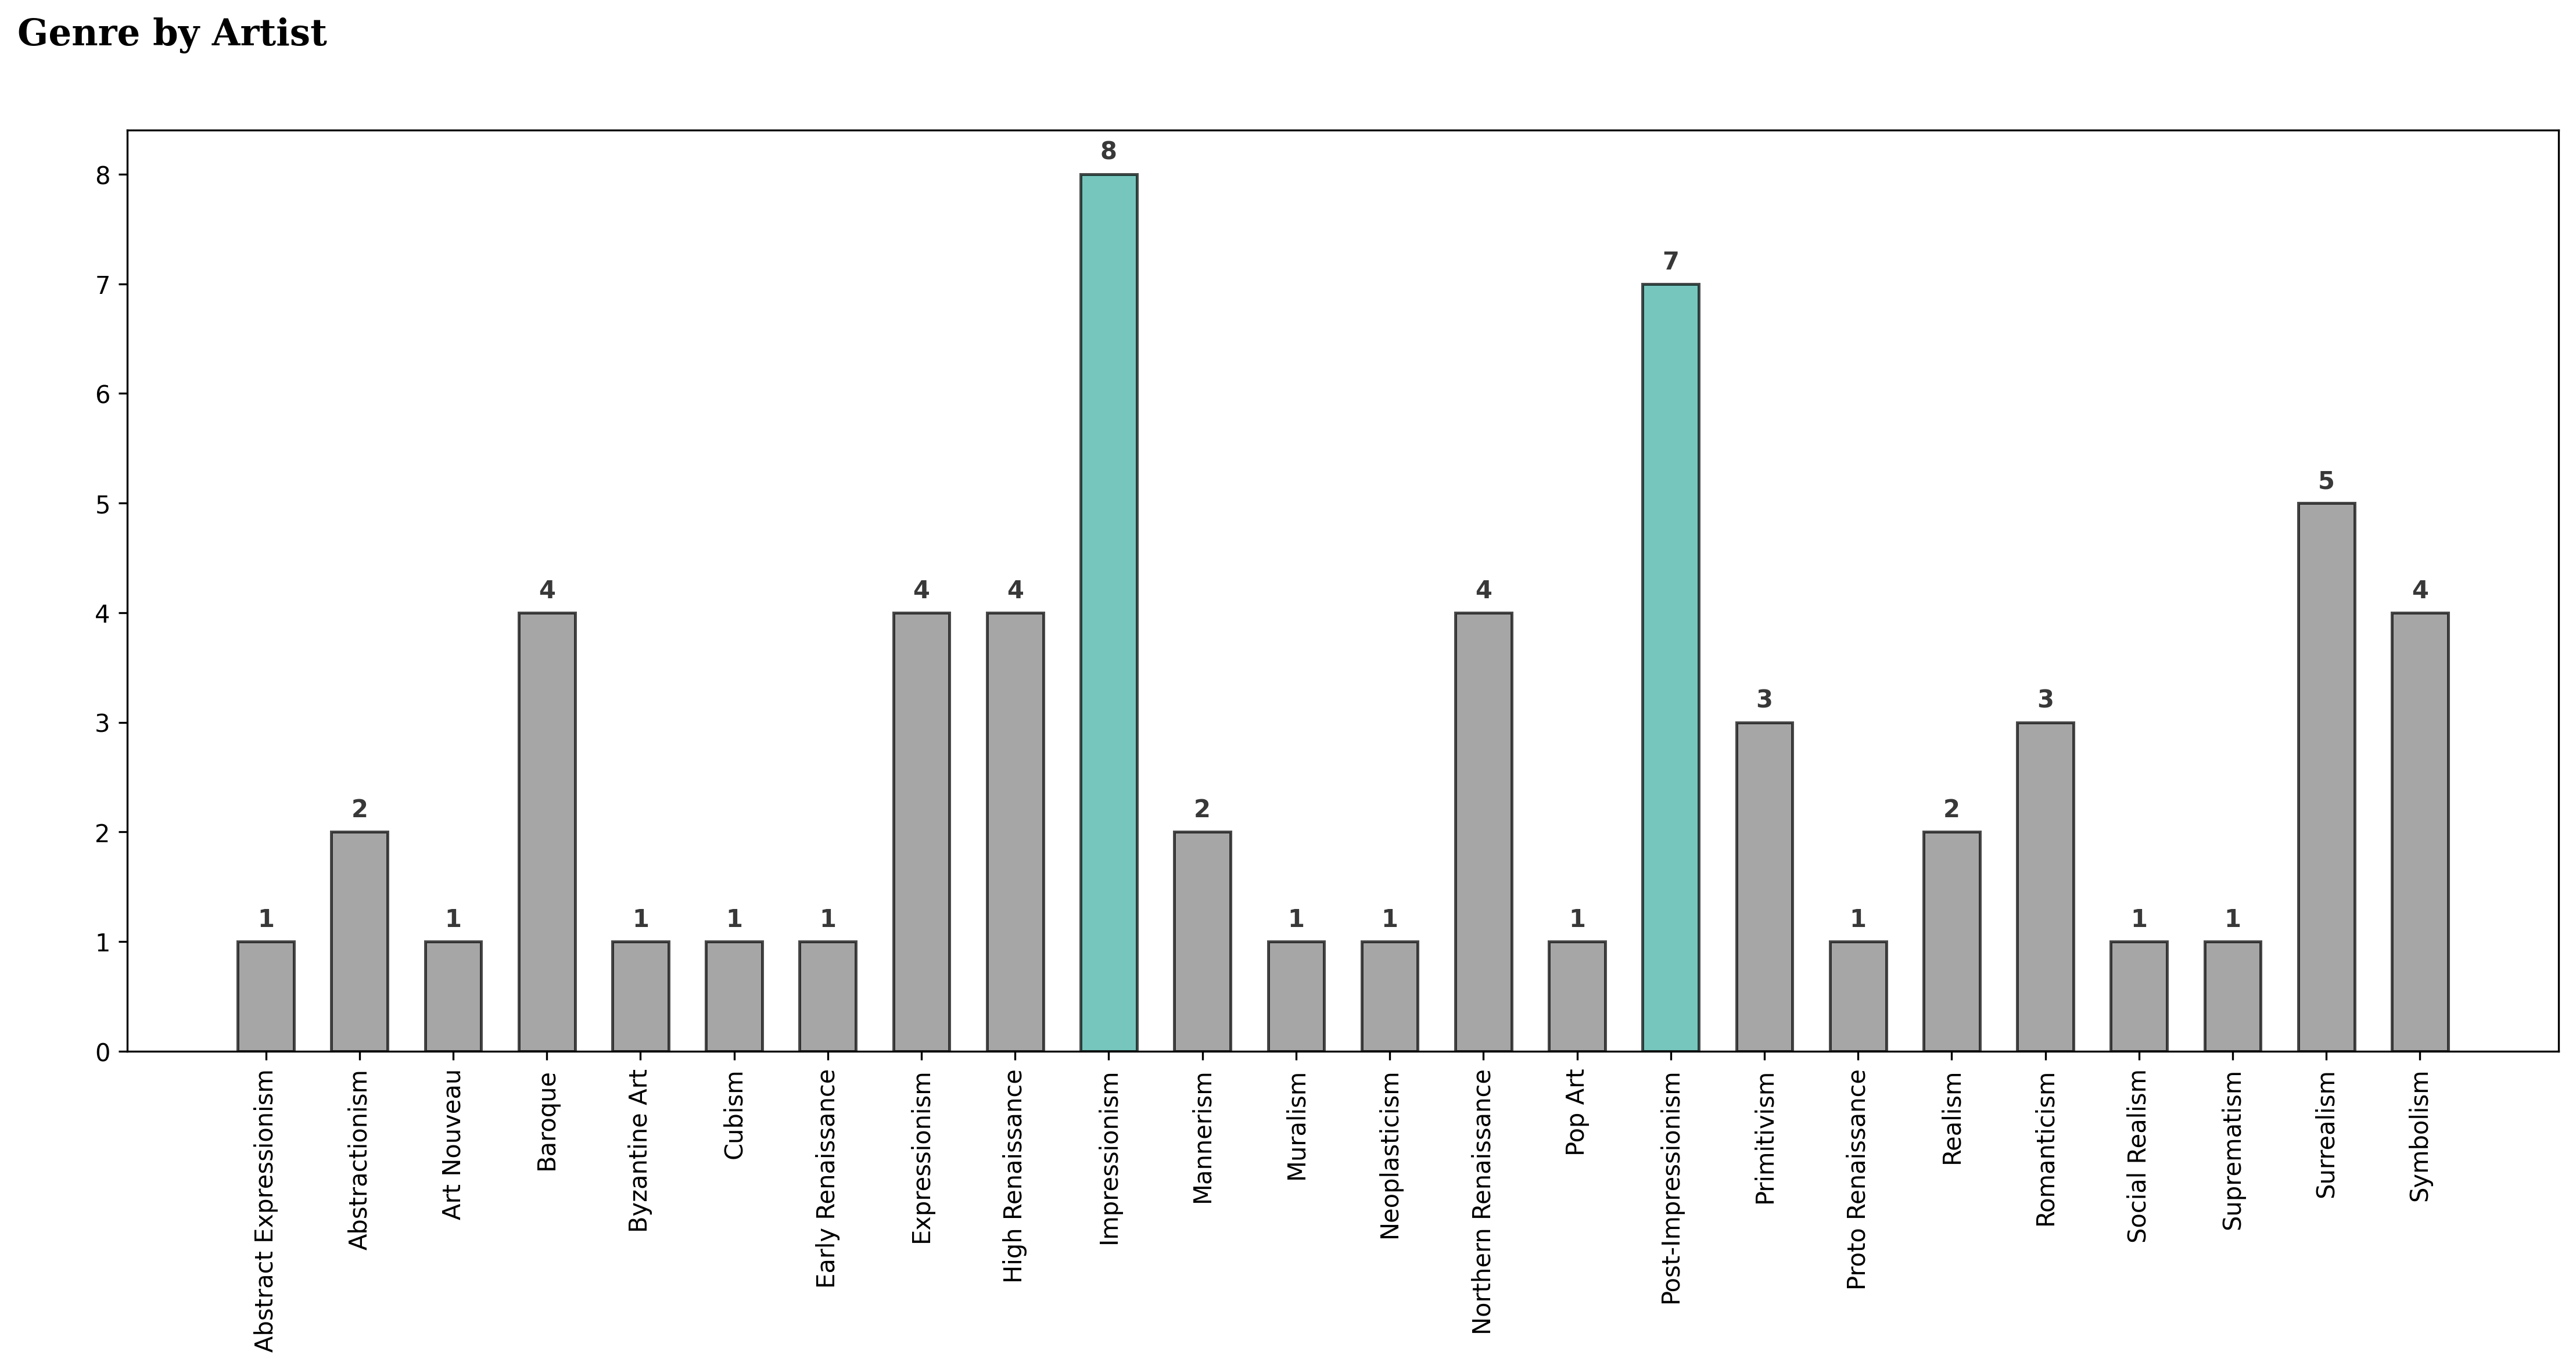

In [156]:
genres=genres.transpose()[0].sort_index()
fig, ax = plt.subplots(1,1, figsize=(18, 7), dpi=300)

color_map = ['gray' for _ in range(24)]
color_map[9] = color_map[15] = '#3caea3'
ax.bar(genres.index, genres, alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
for i in genres.index:
    ax.annotate(genres[i], 
                xy=(i, genres[i]+0.2),
                va = 'center', ha='center',fontweight='bold', color='#383838'
              )
fig.text(0.09, 0.95, 'Genre by Artist', fontsize=15, fontweight='bold', fontfamily='serif') 
plt.xticks(rotation=90)
plt.show()

확인해보면 Impressionism, Post-Impressionism이 가장 많습니다. 이 주의는 근대에 포함됩니다. 그리고 앞서 언급했듯이 에드가 드가는 Impressionism 반 고흐가 Post-Impressionism입니다. 


|Post-Impressionism(탈인상주의)|Impressionism(인상주의)|
|------|------|
|<img width="120px" height="100px" src="https://w.namu.la/s/a7ef4c228e3c1820a7040165613f6744510310514e68c62aaa3c66a448996de38aa29d4143ba7441ffb2ca1136812758774b55379d382183fcaaec977cb95cc00169cef7432dcc09d820385af832476b1a788ce9b840f01c0d4380c2d714ee94176c9ad53ba7cf5d5358c1d2cafedc63">|<img width="120px" height="100px" class="l-u-Ab-zb-Ua" data-drive-wiz-load-handling="" src="https://w.namu.la/s/4e1c61a9808fa71a29e09dbe05f0857dfb9b7ea7e711641d9d6fa507a7858106409b1ce261aca8a876f20ca289dbbdaaac5a912d139cd3fcd0e6c3d41655fdcee7a4e541bd1144edfdb342af253ab8ee95aa25baebf9c80b951c43e16af957b2dce3a5ed5efb2258fdc0e65ee9c36ff0">|


탈인상주의는 인상주의 영향을 받았습니다. 하지만 엄연히 다른 스타일을 가진 것을 확인 할 수 있습니다.

결론적으로 장르 같은 경우 Impressionism 다음으로는 Post-Impressionism이 가장 많습니다. 이 장르들은 19-20세기 근대시대에 유행한 주의입니다. 그리고 가장 그림을 많이 가진 반고흐와 에드가 드가가 포함되는 주의입니다.

 train 데이터에는 20-19세기 인상주의와 탈인상주의 그림이 많습니다. 그리고 그중 반고흐와 에드가 드가 그림이 많습니다. 모델이 이와 같은 그림 스타일을 학습 할 거 라고 예상할 수 있습니다.

# 참고 자료
* [탈인상주의](https://namu.wiki/w/%ED%83%88%EC%9D%B8%EC%83%81%EC%A3%BC%EC%9D%98)
* [인상주의](https://w.namu.la/s/4e1c61a9808fa71a29e09dbe05f0857dfb9b7ea7e711641d9d6fa507a7858106409b1ce261aca8a876f20ca289dbbdaaac5a912d139cd3fcd0e6c3d41655fdcee7a4e541bd1144edfdb342af253ab8ee95aa25baebf9c80b951c43e16af957b2dce3a5ed5efb2258fdc0e65ee9c36ff0)
* [나무위키 미술사](https://namu.wiki/w/%EB%AF%B8%EC%88%A0%EC%82%AC%20%EA%B4%80%EB%A0%A8%20%EC%A0%95%EB%B3%B4)


* [시각화](https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips)
* [시각화2](https://www.kaggle.com/code/subinium/kaggle-2020-visualization-analysis)